In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

df = pd.read_csv('../../samples_allGuitar_20480_Mm7_R1D.csv')

X_load = np.array(df.iloc[:,:-1], dtype=np.float)
y_load = np.array(df.iloc[:,-1], dtype=np.float)

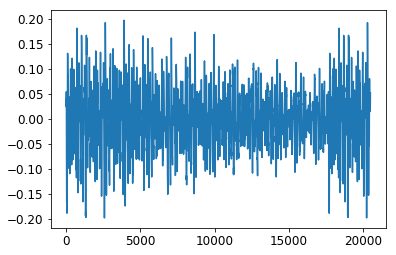

In [4]:
X = X_load[2000]
y = y_load[2000]

plt.plot(X)
plt.show()

(20480,)


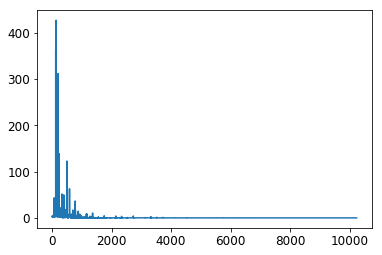

(10241,)


C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


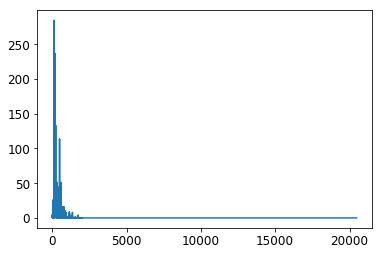

(20480,)


C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


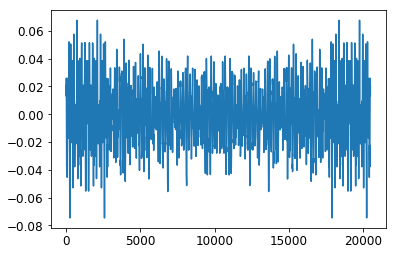

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\numpy\fft\fftpack.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  a = array(a, copy=True, dtype=float)


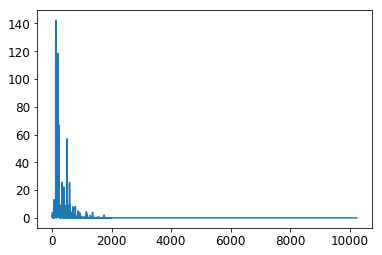

In [39]:
print(X.shape)
X_fft = np.fft.rfft(X)
plt.plot(abs(X_fft))
plt.show()

print(X_fft.shape)
# X_fft_new = (X_fft[:1000])

X_fft_new = np.zeros(20480)
for i in range(len(X_fft)):
    if i < 2001: #ignore frequencies greater than 2kHz
        X_fft_new[i] = X_fft[i]

plt.plot(abs(X_fft_new))
plt.show()

X_new = np.fft.ifft(X_fft_new)
print(X_new.shape)
plt.plot(X_new)
plt.show()

plt.plot(abs(np.fft.rfft(X_new)))
plt.show()

In [40]:
import librosa

sample = librosa.feature.chroma_stft(y=X_new, sr=44100, n_fft=20480, hop_length=258)
# sample = np.atleast_3d(sample)

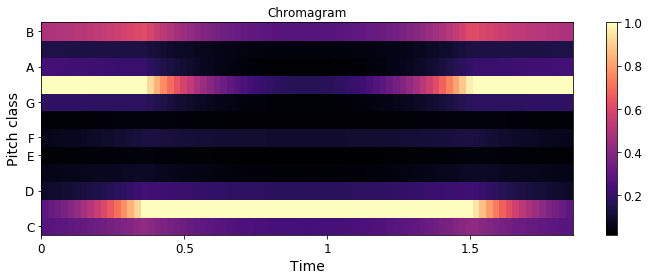

In [41]:
import librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(sample, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()